In [ ]:
# 201500684 박종혁

In [ ]:
# 1. 예제 작성해보기

In [ ]:
# 조건부 확룰

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
import math, random

def random_kid():
    return random.choice(["boy", "girl"])

kid_test_list = [random_kid() for i in range(10)]
kid_test_list

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

['girl', 'boy', 'girl', 'girl', 'girl', 'girl', 'boy', 'girl', 'girl', 'girl']

2472

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [ ]:
# 베이즈 정리

In [12]:
# P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)

# P(F) = P(F,E) + P(F,¬E)

# P(E|F) = P(F|E)P(E)/[P(F|E)P(E) + P(F|¬E)P(¬E)]

In [ ]:
# 확률 변수

In [ ]:
# 확률변수란 특정 확률분포와 연관되어 있는 변수를 의미합니다

In [ ]:
# 연속 분포 (균등분포)

(-1.0, 2.0, -1.0, 1.5)

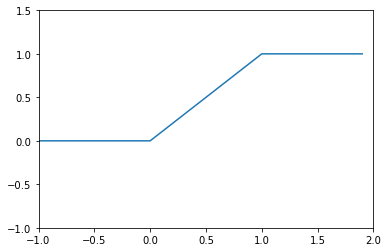

In [19]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1
    
import numpy as np
x  = np.arange(-1.0, 2.0, 0.1)

result_array = np.vectorize(uniform_cdf, otypes=[np.float64])(x)

import matplotlib.pyplot as plt
# %pylab inline

plt.plot(x, result_array)
plt.axis([-1, 2, -1, 1.5])
plt.show()

In [ ]:
# 정규 분포

(-6.0, 6.0, 0.0, 1.0)

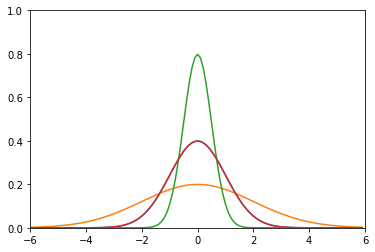

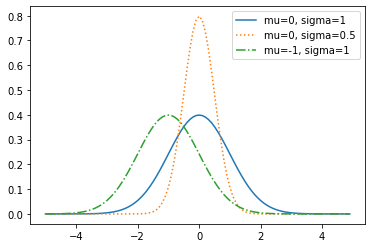

In [27]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2) / (sqrt_two_pi * sigma))

for sigma_value in [1,2,0.5,1]:
    x = np.arange(-6.0, 6.0, 0.1)
    result_array = np.vectorize(normal_pdf, otypes=[np.float64])(x, sigma=sigma_value)
    plt.plot(x, result_array)
    
plt.axis([-6, 6, 0, 1])
plt.show()

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
    plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
    plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt
plot_normal_pdfs(plt)

In [ ]:
# 표준정규분포

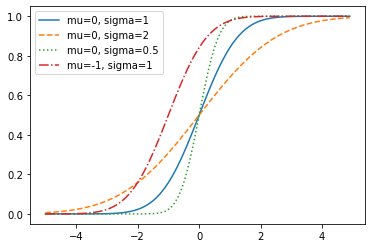

In [31]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
    plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
    plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
    plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
    plt.legend(loc=2)
    plt.show()
    
plot_normal_cdfs(plt)

In [ ]:
# 정규분포 누적 분포 함수의 역함수

In [34]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) /2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

np.vectorize(inverse_normal_cdf, otypes=[np.float64])([0, 0.5, 0.90, 0.95, 0.975, 1])

array([-8.75      ,  0.        ,  1.28155708,  1.64484978,  1.95996284,
        8.75      ])

In [ ]:
# 중심극한정리

C:\Users\ghpmc\AppData\Local\Temp/ipykernel_24988/4106496540.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(bernoulli_trial(p) for _ in range(n))


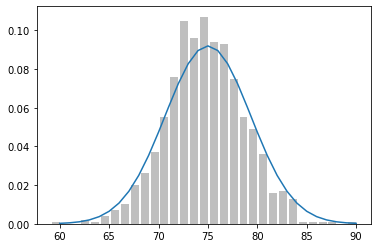

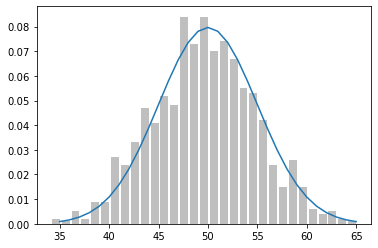

In [38]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
    
def binomial(p ,n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(p, n) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color="0.75")
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.show()
    
make_hist(0.75, 100, 1000)
make_hist(0.50, 100, 1000)

In [ ]:
# 2. 학번과 이름을 출력

In [39]:
print("201500684 박종혁")

201500684 박종혁


In [ ]:
# 201500684 박종혁